<center><b><font size="10px" >Pizza trends</b></center>

## Data Wrangling

### importing libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### loading all the CSV files using pandas


In [6]:
regionData = pd.read_csv("./Region.csv")
storeDetailsData = pd.read_csv("./StoreDetails.csv")
weeklySalesData = pd.read_csv("./Weekly-Sales.csv")

### Displaying dataset sample and its description

In [10]:
print("Regions Dataset : ")
print(regionData.head())
print("\nRegions Dataset Description : ")
print(regionData.describe())

print("\nStore Details Dataset : ")
print(storeDetails.head())
print("\nStore Details Dataset Description : ")
print(storeDetails.describe())

print("\nWeekly Sales Dataset : ")
print(weeklySalesData.head())
print("\nWeekly Sales Dataset Description : ")
print(weeklySalesData.describe())

Regions Dataset : 
   Store Region
0      1      A
1      2      A
2      3      A
3      4      A
4      5      A

Regions Dataset Description : 
           Store
count  45.000000
mean   23.000000
std    13.133926
min     1.000000
25%    12.000000
50%    23.000000
75%    34.000000
max    45.000000

Store Details Dataset : 
   Store        Date  Temperature  Unemployment
0      1   5/02/2010        42.31         8.106
1      1  12/02/2010        38.51         8.106
2      1  19/02/2010        39.93         8.106
3      1  26/02/2010        46.63         8.106
4      1   5/03/2010        46.50         8.106

Store Details Dataset Description : 
             Store  Temperature  Unemployment
count  8190.000000  8190.000000   7605.000000
mean     23.000000    59.356198      7.826821
std      12.987966    18.678607      1.877259
min       1.000000    -7.290000      3.684000
25%      12.000000    45.902500      6.634000
50%      23.000000    60.710000      7.806000
75%      34.000000    73.8

### Merging all dataset with key as store details


In [95]:
tempMerged = pd.merge(weeklySalesData,storeDetailsData)
mergedData =  pd.merge(regionData,tempMerged)
print("Merged dataset: ")
print(mergedData.head())
print("Merged dataset description")
print(mergedData.describe())

Merged dataset: 
   Store Region        Date  Weekly_Sales  Temperature  Unemployment
0      1      A   5/02/2010      24924.50        42.31         8.106
1      1      A  12/02/2010      46039.49        38.51         8.106
2      1      A  19/02/2010      41595.55        39.93         8.106
3      1      A  26/02/2010      19403.54        46.63         8.106
4      1      A   5/03/2010      21827.90        46.50         8.106
Merged dataset description
             Store   Weekly_Sales  Temperature  Unemployment
count  6435.000000    6435.000000  6435.000000   6435.000000
mean     23.000000   19213.485088    60.663782      7.999151
std      12.988182   15102.373853    18.444933      1.875885
min       1.000000     711.110000    -2.060000      3.879000
25%      12.000000   10423.465000    47.460000      6.891000
50%      23.000000   15314.910000    62.670000      7.874000
75%      34.000000   23135.595000    74.940000      8.622000
max      45.000000  172225.550000   100.140000     14.

## Data visualization

### Converting date column as datetime data type

In [96]:
mergedData['Date'] = pd.to_datetime(mergedData['Date'])
mergedData.set_index('Date', inplace=True)

In [97]:
mergedData.head()

,Store,Region,Weekly_Sales,Temperature,Unemployment
Date,,,,,
2010-05-02,1,A,24924.50,42.31,8.106
2010-12-02,1,A,46039.49,38.51,8.106
2010-02-19,1,A,41595.55,39.93,8.106
2010-02-26,1,A,19403.54,46.63,8.106
2010-05-03,1,A,21827.90,46.50,8.106


### Insight-1 (Pizza value changes)

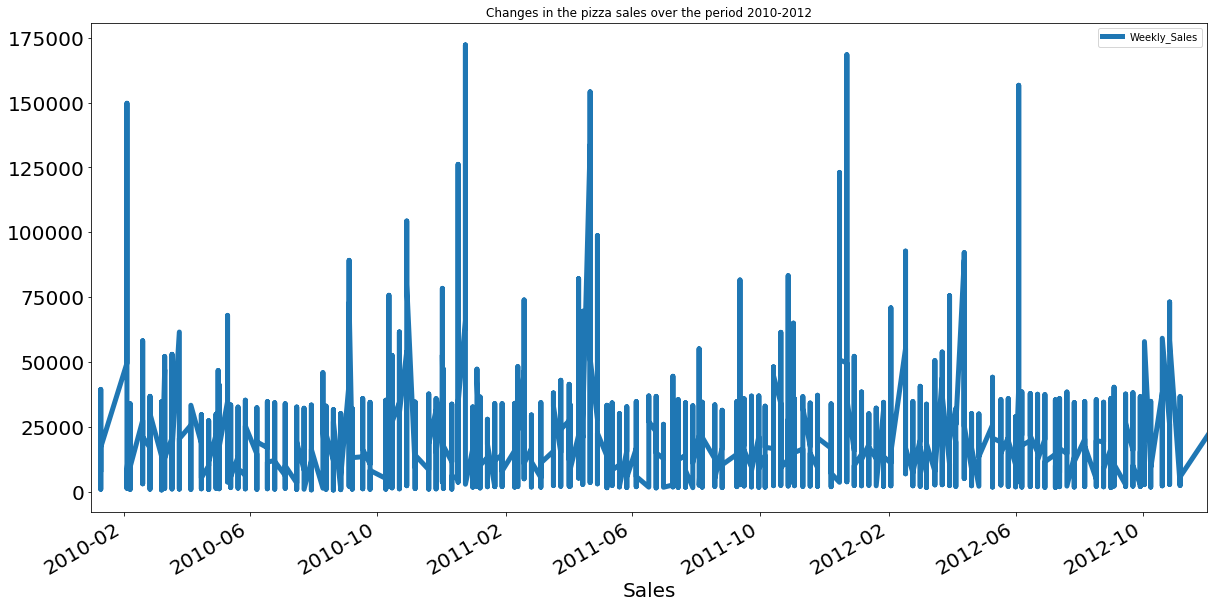

In [30]:
mergedData[['Weekly_Sales']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.xlim([pd.Timestamp('2010-01'), pd.Timestamp('2012-12')])
plt.xlabel('Sales', fontsize=20);
plt.title("Changes in the pizza sales over the period 2010-2012")
plt.show()

### Insight-2 (sales comparison among regions)

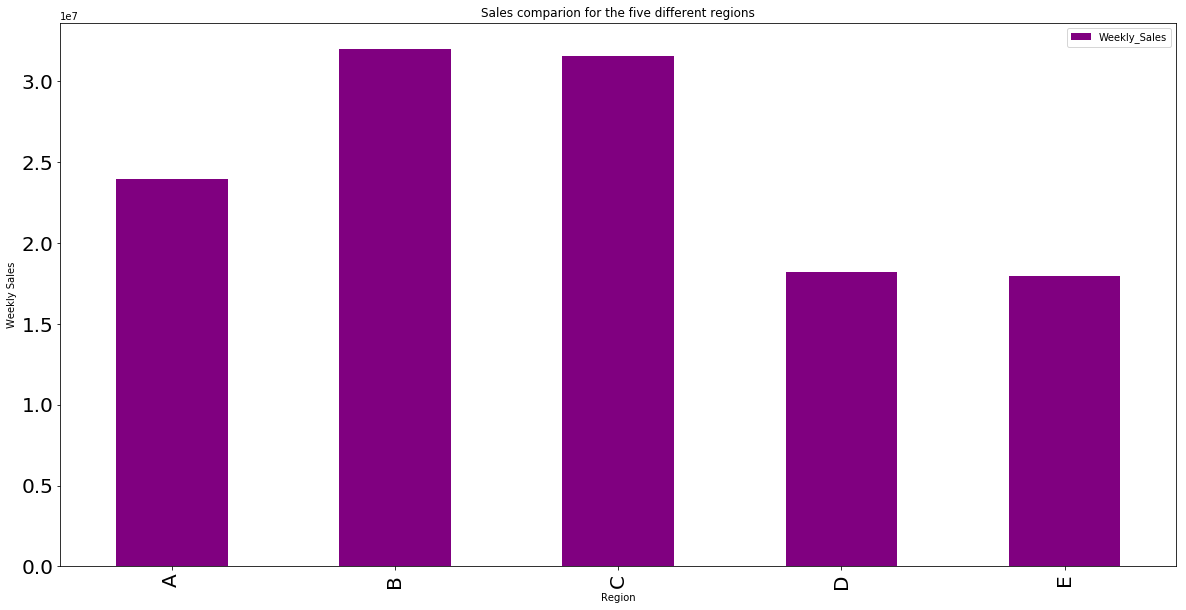

In [42]:
comparisonData = mergedData[["Region", "Weekly_Sales"]]
comparisonData.groupby("Region").sum().plot(figsize=(20,10),kind="bar",title="Sales comparion for the five different regions",color='purple',fontsize=20)
plt.ylabel('Weekly Sales',fontsize=10)
plt.show()

### Insight-3 (sales against the different store)

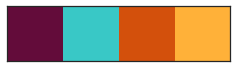

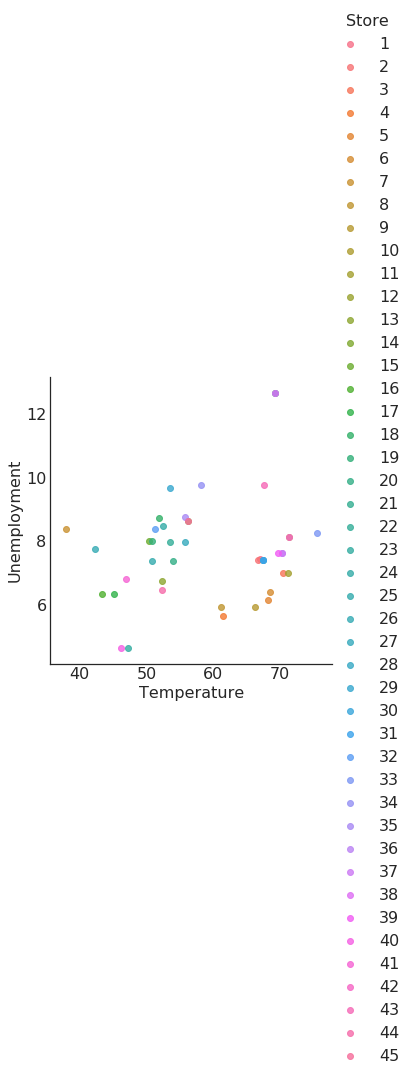

In [126]:
relationshipData = storeDetailsData.groupby("Store").mean().reset_index()
plt.rc('font', size=16)
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

acet = sns.lmplot(data=relationshipData, x='Temperature', y='Unemployment', hue='Store',fit_reg=False, legend=True, legend_out=True)

###  Insight-4 (Trends of all stores - Comparison)

In [93]:
year = int(input("Enter the year for comparing the trends :-" ))

Enter the year for comparing the trends :-2012


In [100]:
mergedData.reset_index(inplace=True)
storeTrend = mergedData.loc[(mergedData['Date'] >= pd.Timestamp(year,1,1))&(mergedData['Date'] <= pd.Timestamp(year,12,31))]

In [107]:
storeTrend.set_index('Date', inplace=True)

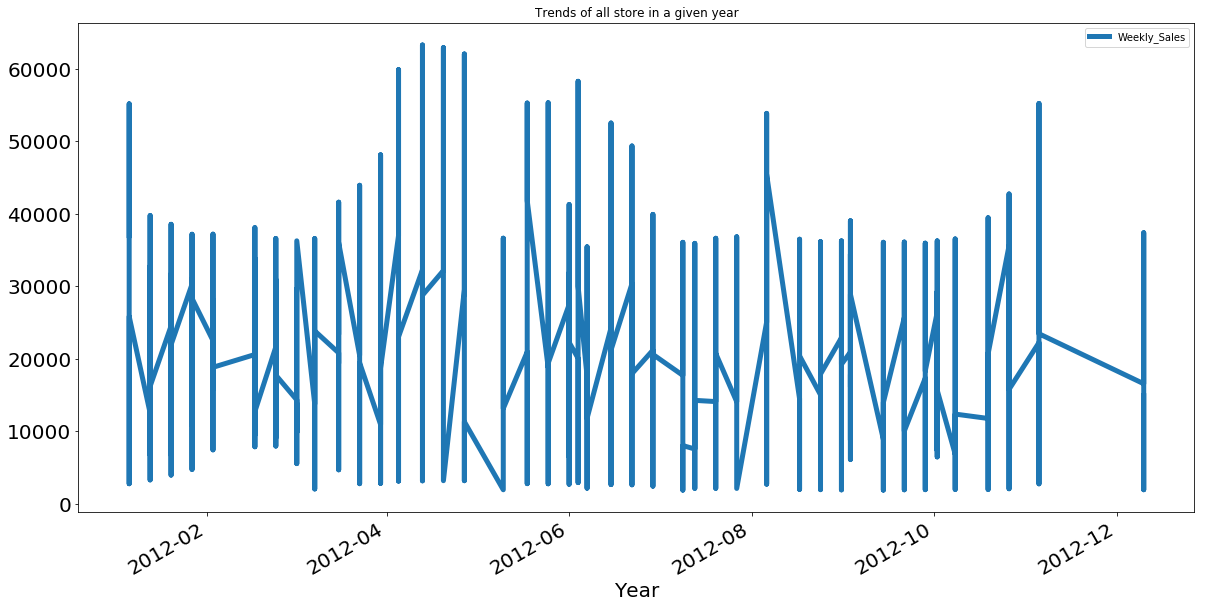

In [117]:
sales = storeTrend[['Weekly_Sales']]
sales.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.title("Trends of all store in a given year")
plt.show()